In [2]:
import networkx as nx
import csv
import os
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import seaborn as sns

In [3]:
from skyfield.api import load, wgs84

stations_url = 'https://celestrak.org/NORAD/elements/gp.php?GROUP=starlink&FORMAT=tle'
satellites = load.tle_file(stations_url)
print('Loaded', len(satellites), 'satellites')
by_name = {sat.name: sat for sat in satellites}
satellite = by_name['STARLINK-1007']

# year, month, day, hour, minute, second
ts=load.timescale()
t = ts.now()
a=satellite.at(t)
lat, lon = wgs84.latlon_of(a)
print('Latitude:', lat)
print('Longitude:', lon)

Loaded 4219 satellites
Latitude: 39deg 55' 32.5"
Longitude: 77deg 57' 53.5"


In [4]:
from common import calculate_visible_satellites

# garching coordinates
observer_latitude = 48.2489
observer_longitude = 11.6532
observer_elevation = 0

visible_satellites = calculate_visible_satellites(
    observer_latitude, observer_longitude, observer_elevation, distance_km=800
)

for sat, alt, az in visible_satellites:
    print(sat.name)
    # print(f"Satellite: {sat}")
    # print(f"Altitude: {alt.degrees} degrees")
    # print(f"Azimuth: {az.degrees} degrees")

STARLINK-2566
STARLINK-3971
STARLINK-4277
STARLINK-5940
STARLINK-5772
FALCON 9 DEB


In [5]:
def idplot(base,hops,_type,method, host=None):
    G = nx.Graph()
    g = {}
    for file in os.listdir(base):
        filename = os.fsdecode(file)
        if _type in filename and method in filename:
            with open(base + filename, "r") as csvfile:
                d = list(csv.reader(csvfile))
                for r in range(len(d)-(30-hops)):
                    ip1 = d[r][2]
                    ip2 = d[r + 1][2]
                    effe = ["*", "ip"]
                    if ip1 not in effe and ip2 not in effe:
                        if ip1 not in g:
                            g[ip1] = []
                        if ip2 not in g[ip1]:
                            g[ip1].append(ip2)

    for k, v in g.items():
        G.add_node(k)
        for i in v:
            G.add_edge(k, i)

    return G

def draw(G):
    _,degree = map(list, zip(*G.degree())) 
    nx.draw_kamada_kawai(
            G,
            node_color=range(len(G.degree())),
            cmap=plt.cm.GnBu,
            # node_size=[(v * 500) + 1 for v in  degree],
            # with_labels=True,
        )

In [6]:
def cloud_draw(provider,hops,method):
    plt.figure(figsize=(10, 15))
    plt.subplot(3, 2, 1)   # Define 3 rows, 2 column, Activate subplot 1. 
    base = f"/home/rc/idp-castellotti-data/new-traceroutes/{provider}/"
    plt.subplot(321).set_title(f"{provider} starlink {hops} hops {method}")
    G=idplot(base=base,hops=8,_type="starlink",method=method)
    draw(G)
    plt.subplot(322).set_title(f"{provider} normal {hops} hops {method} ")
    G=idplot(base=base,hops=hops,_type="normal",method=method)
    draw(G)
    plt.show()

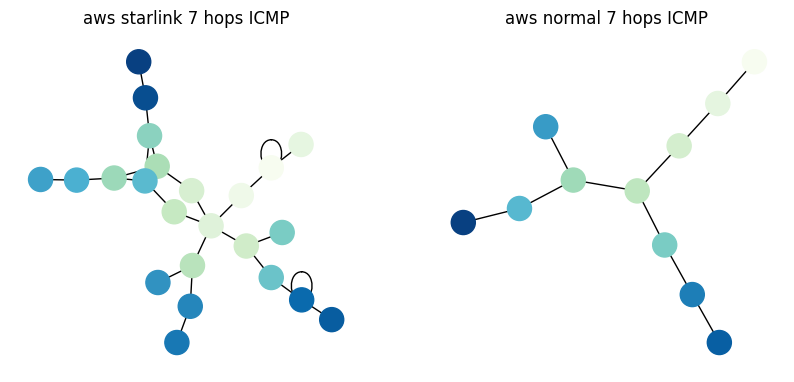

In [7]:
cloud_draw(provider="aws",hops=7,method="ICMP")

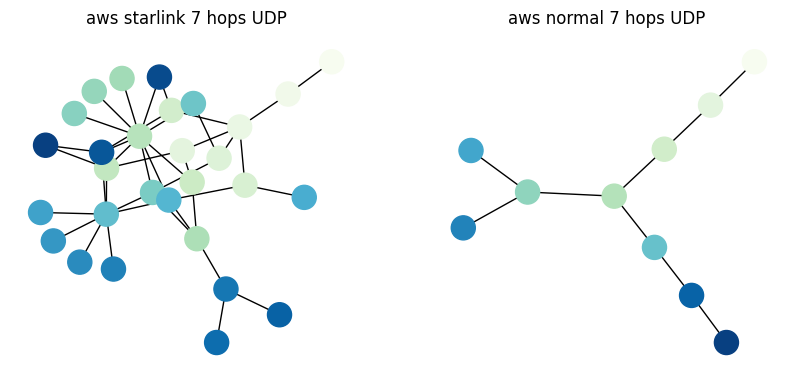

In [8]:
cloud_draw(provider="aws",hops=7,method="UDP")

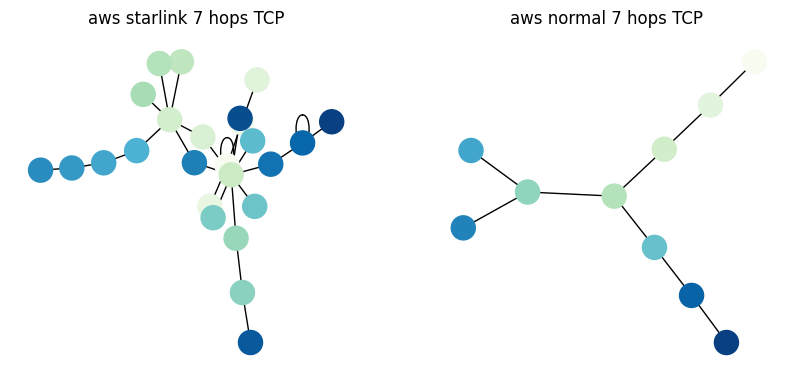

In [9]:
cloud_draw(provider="aws",hops=7,method="TCP")

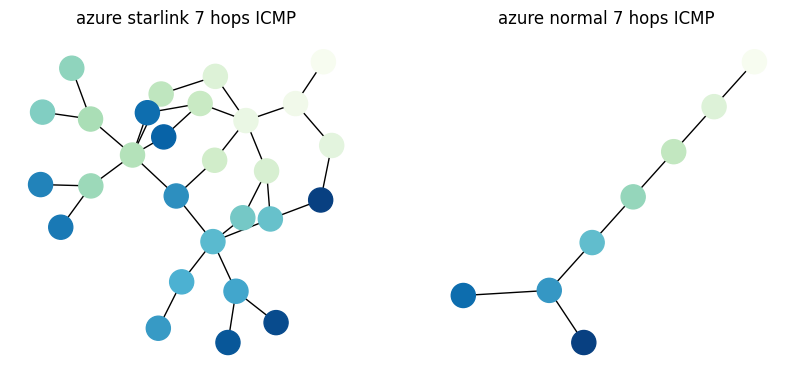

In [10]:
cloud_draw(provider="azure",hops=7,method="ICMP")

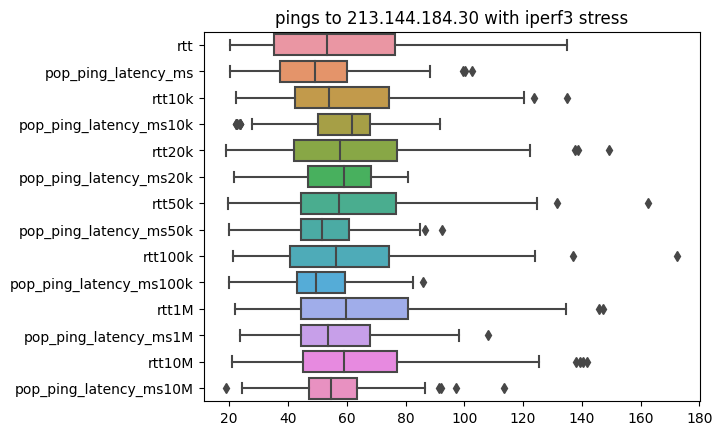

In [11]:
df0 = pd.read_csv("/home/rc/idp-castellotti-data/ping-bw-normal.csv")
df1 = pd.read_csv("/home/rc/idp-castellotti-data/ping-bw-10k.csv")
df2 = pd.read_csv("/home/rc/idp-castellotti-data/ping-bw-20k.csv")
df3 = pd.read_csv("/home/rc/idp-castellotti-data/ping-bw-50k.csv")
df4 = pd.read_csv("/home/rc/idp-castellotti-data/ping-bw-100k.csv")
df5 = pd.read_csv("/home/rc/idp-castellotti-data/ping-bw-1M.csv")
df6 = pd.read_csv("/home/rc/idp-castellotti-data/ping-bw-10M.csv")
df = pd.concat([df0, df1, df2, df3, df4, df5, df6], axis=1).reindex(df1.index)
sns.boxplot(
    data=df[
        [
            "rtt",
            "pop_ping_latency_ms",
            "rtt10k",
            "pop_ping_latency_ms10k",
            "rtt20k",
            "pop_ping_latency_ms20k",
            "rtt50k",
            "pop_ping_latency_ms50k",
            "rtt100k",
            "pop_ping_latency_ms100k",
            "rtt1M",
            "pop_ping_latency_ms1M",
            "rtt10M",
            "pop_ping_latency_ms10M",
        ]
    ],
    orient="h",
).set_title("pings to 213.144.184.30 with iperf3 stress")
plt.show()

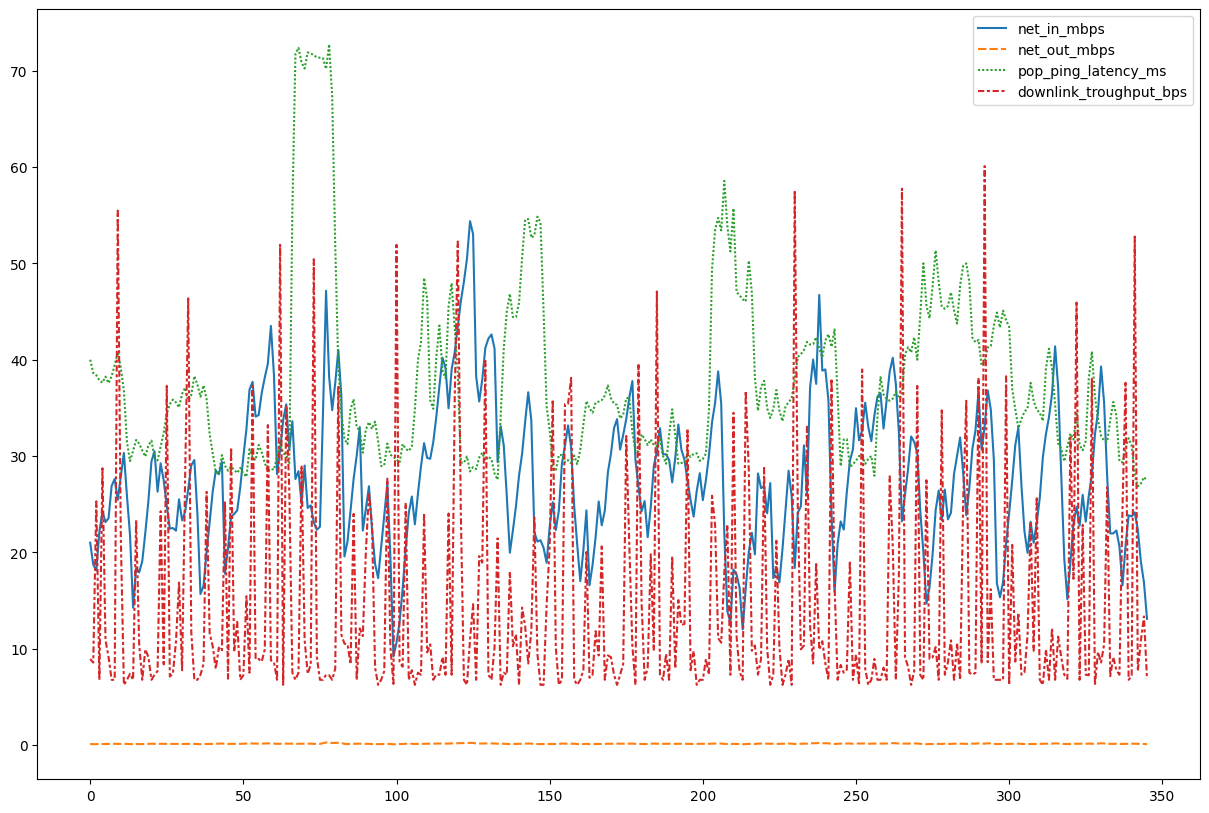

In [12]:
plt.figure(figsize=(15, 10))
df = pd.read_csv('/home/rc/idp-castellotti-data/large_file_download.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'], format ='%Y-%m-%d %H:%M:%S.%f')
sns.lineplot(data=df,dashes=True)
plt.show()

,id,satname,alt,az,start_timestamp,end_timestamp,visible,duration
0,1,STARLINK-1317,"43deg 05' 52.8""","323deg 02' 35.4""",2023-06-16 14:49:16.055117,2023-06-16 14:51:50.725637,0,0 days 00:02:34.670520
1,2,STARLINK-3506,"61deg 36' 22.7""","307deg 13' 53.1""",2023-06-16 14:49:16.055117,2023-06-16 14:50:24.313074,0,0 days 00:01:08.257957
2,3,STARLINK-4361,"81deg 09' 19.0""","180deg 09' 19.6""",2023-06-16 14:49:16.055117,2023-06-16 14:50:18.076916,0,0 days 00:01:02.021799
3,4,STARLINK-5059,"41deg 13' 54.3""","201deg 08' 42.8""",2023-06-16 14:49:16.055117,2023-06-16 14:51:56.982803,0,0 days 00:02:40.927686
4,5,STARLINK-1522,"41deg 27' 02.4""","256deg 24' 06.6""",2023-06-16 14:49:46.635173,2023-06-16 14:50:42.779802,0,0 days 00:00:56.144629


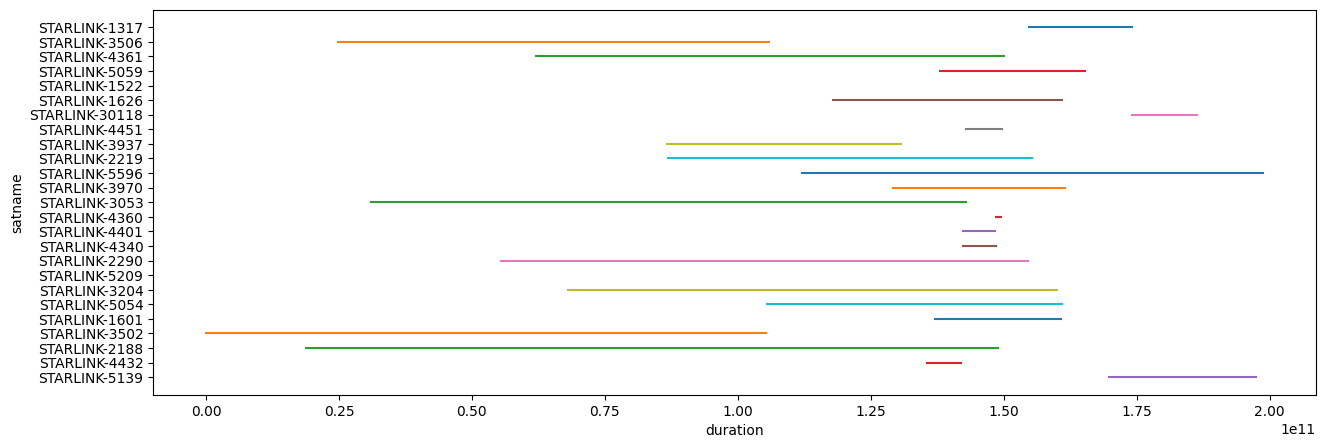

In [16]:
cnx = sqlite3.connect('satellites.sqlite')
df = pd.read_sql_query('select * from satellites',cnx)
df['start_timestamp'] = pd.to_datetime(df['start_timestamp'], format ='%Y-%m-%d %H:%M:%S.%f')
df['end_timestamp'] = pd.to_datetime(df['end_timestamp'], format ='%Y-%m-%d %H:%M:%S.%f')
df['duration'] = df['end_timestamp'] - df['start_timestamp']
plt.figure(figsize=(15, 5))
unique_satellites=df['satname'].unique()[:25]
for sat in unique_satellites:
    daf=df.loc[df['satname'] == sat]
    sns.lineplot(data=daf, x="duration", y="satname",dashes=True)
df.head()


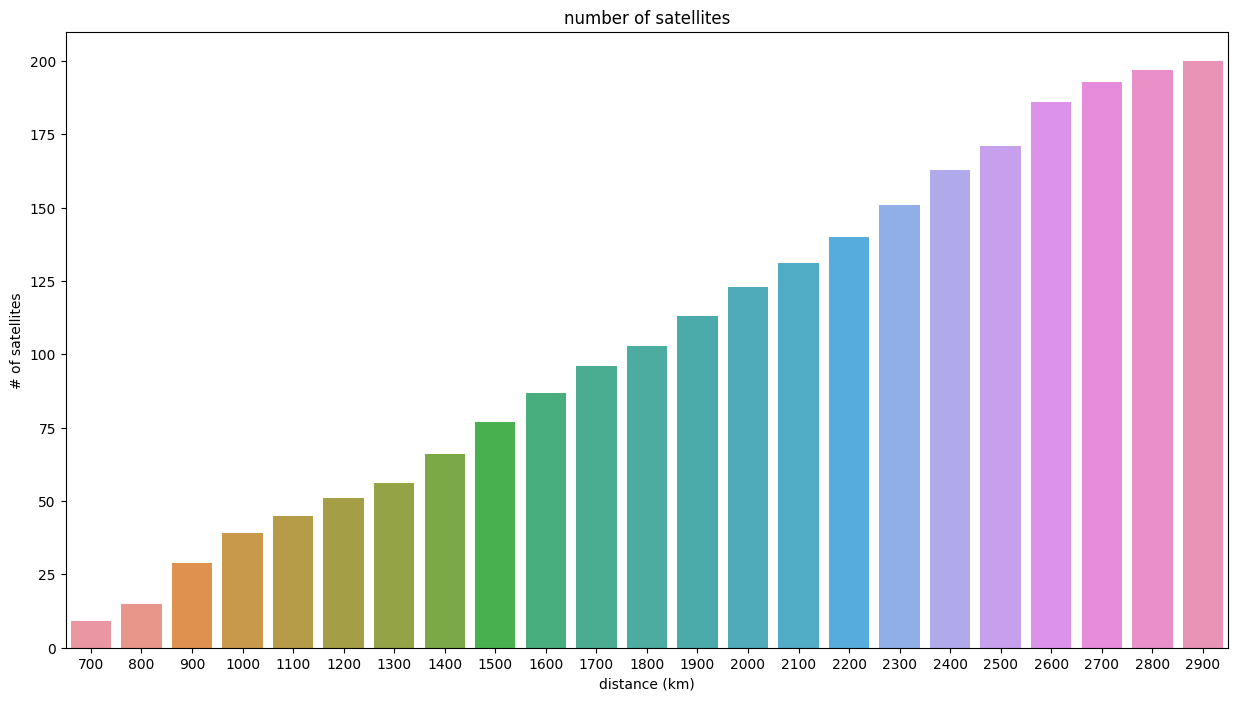

In [14]:
df = pd.read_csv('/home/rc/idp-castellotti-data/visible_satellites_variable_distance.csv')
plt.figure(figsize=(15, 8))
sns.countplot(x=df["distance"]).set_title("number of satellites")
plt.ylabel("# of satellites")
plt.xlabel("distance (km)")
plt.show()